Using device: cpu
torch loaded; device is cpu


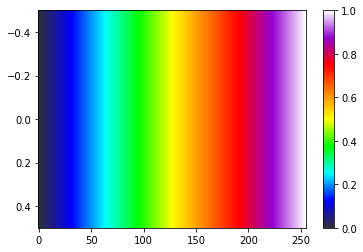

[ Starting Feel++ ] application feelpp_app version 0.1 date 2025-Apr-15
 . feelpp_app files are stored in /workspaces/feelpp-scimba/feelppdb/feelpp_cfpde/np_1
 .. logfiles :/workspaces/feelpp-scimba/feelppdb/feelpp_cfpde/np_1/logs


In [1]:
import sys
import feelpp.core as fppc
import feelpp.toolboxes.core as tb

# Modification ici pour importer ParametricDiffusion
from tools.Diffusion_param import ParametricDiffusion
# Ligne concernant Poisson supprimée si vous ne l'utilisez pas dans ce script

sys.argv = ["feelpp_app"]
e = fppc.Environment(sys.argv,
                        opts=tb.toolboxes_options("coefficient-form-pdes", "cfpdes"),
                        config=fppc.localRepository('feelpp_cfpde'))

# ------------------------------------------------------------------------- #
# Parametric Diffusion problem
# - div (diff(mu) * grad (u)) = f(mu)   in Omega
#                                 u     = g(mu)   in Gamma_D 
# Omega = domain (e.g., square, disk)
# Approx = lagrange Pk of order order
# mesh of size h

# Utilisation de la classe ParametricDiffusion
P_diff = ParametricDiffusion(dim = 2)



Résolution pour mu = 0.1
Solving the parametric diffusion problem for mu = 0.1, h = 0.05...
generate mesh omega-2.geo with h=0.05 and dimension=2
[loadMesh] Loading mesh in format geo+msh: "/workspaces/feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo"
[loadMesh] Use default geo desc: /workspaces/feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo 0.05 
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Toolbox::cfpdes-2d-p1 - Use Case Study                                                                                                                                                             |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| +----------------------------------------

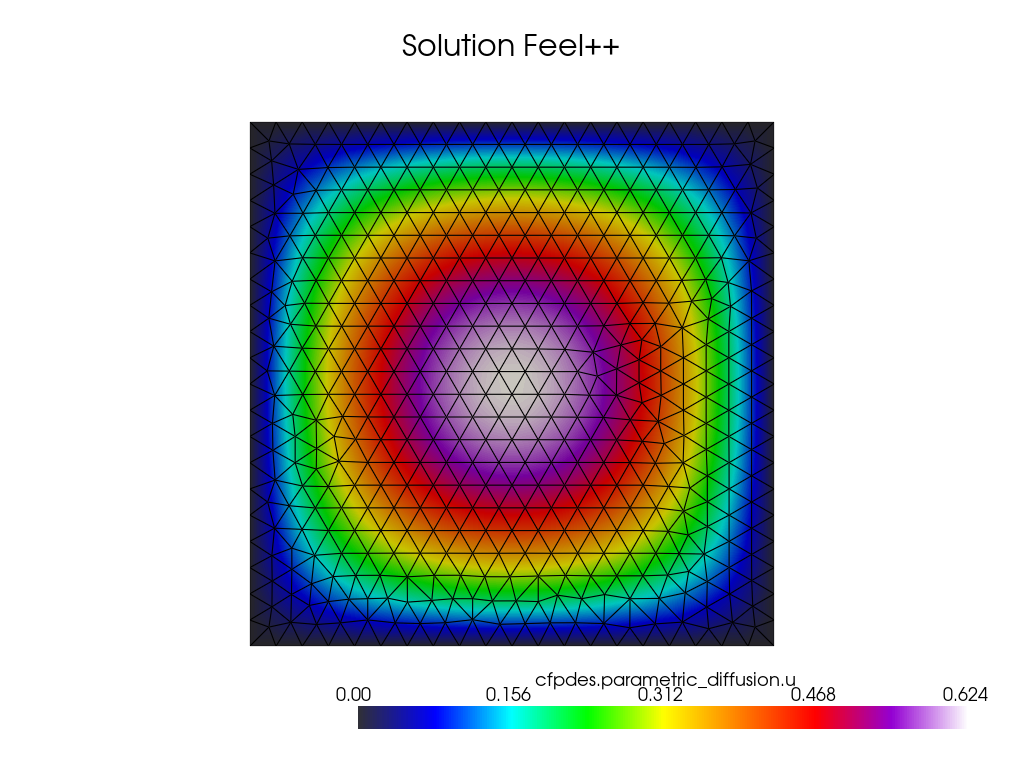

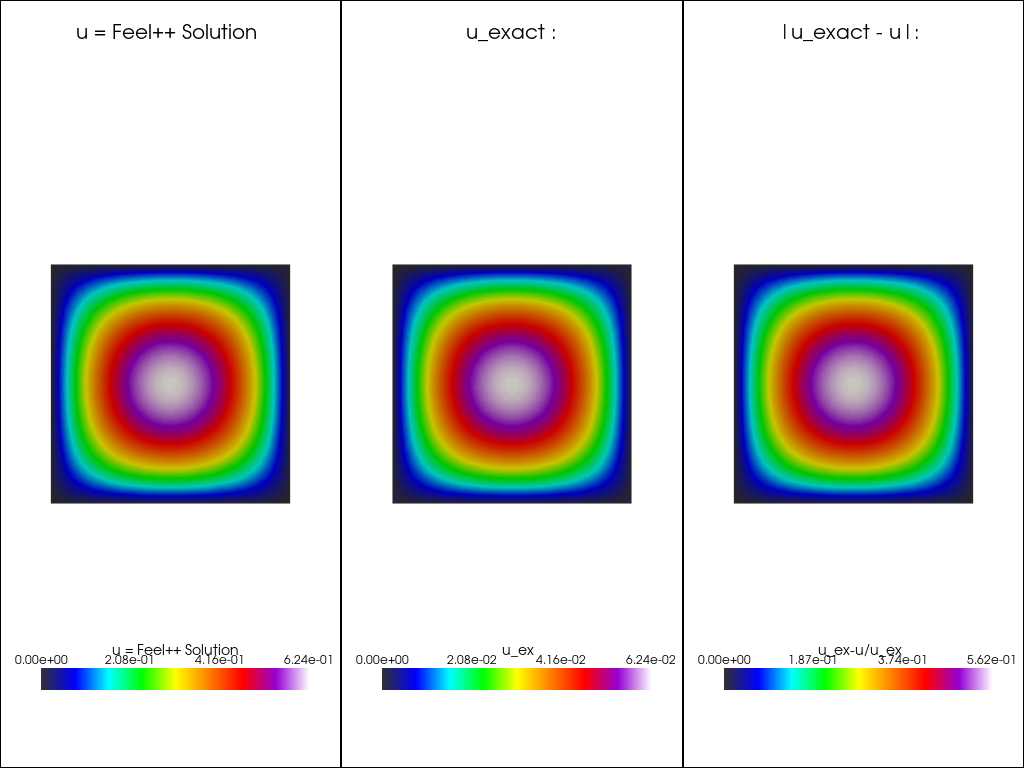

Simulation de diffusion paramétrique terminée pour mu = 0.1
Résolution pour mu = 0.5
Solving the parametric diffusion problem for mu = 0.5, h = 0.05...
generate mesh omega-2.geo with h=0.05 and dimension=2
[loadMesh] Loading mesh in format geo+msh: "/workspaces/feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo"
[loadMesh] Use default geo desc: /workspaces/feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo 0.05 
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Toolbox::cfpdes-2d-p1 - Use Case Study                                                                                                                                                             |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

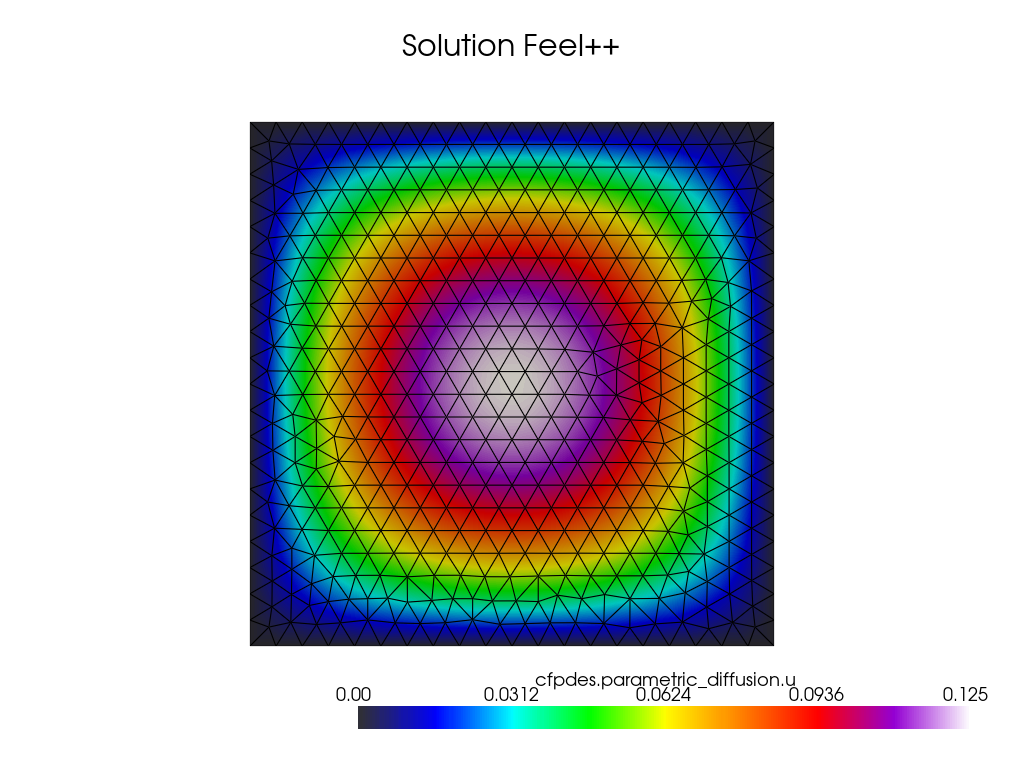

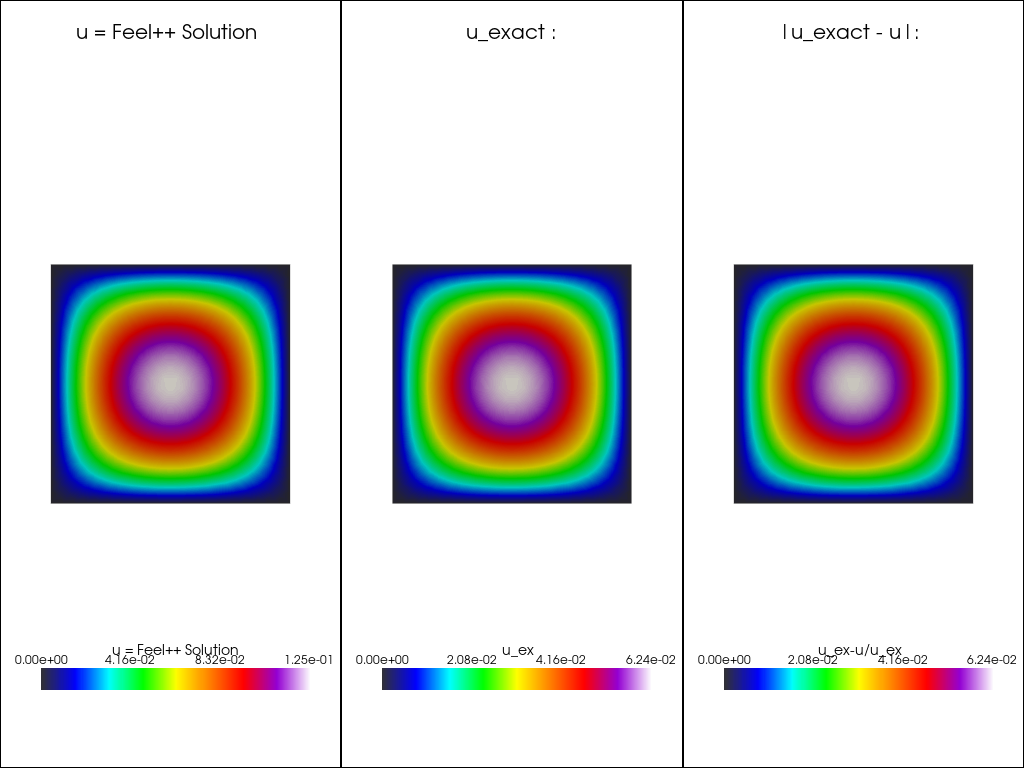

Simulation de diffusion paramétrique terminée pour mu = 0.5
Résolution pour mu = 1.0
Solving the parametric diffusion problem for mu = 1.0, h = 0.05...
generate mesh omega-2.geo with h=0.05 and dimension=2
[loadMesh] Loading mesh in format geo+msh: "/workspaces/feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo"
[loadMesh] Use default geo desc: /workspaces/feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo 0.05 
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Toolbox::cfpdes-2d-p1 - Use Case Study                                                                                                                                                             |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

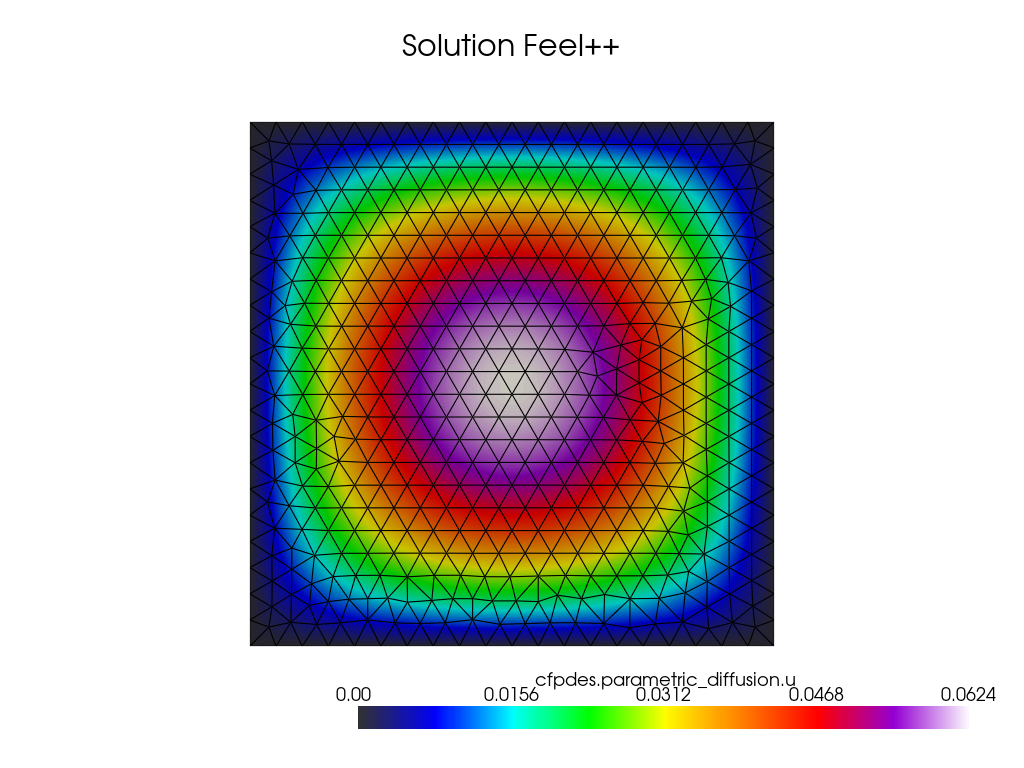

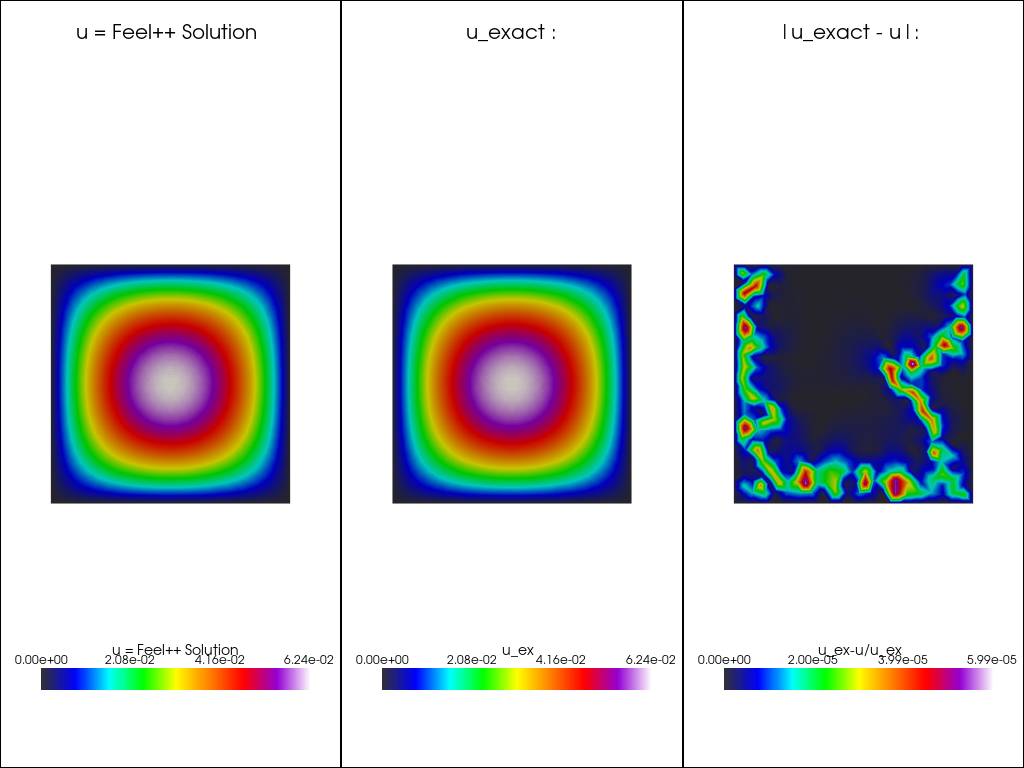

Simulation de diffusion paramétrique terminée pour mu = 1.0
Résolution pour mu = 2.0
Solving the parametric diffusion problem for mu = 2.0, h = 0.05...
generate mesh omega-2.geo with h=0.05 and dimension=2
[loadMesh] Loading mesh in format geo+msh: "/workspaces/feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo"
[loadMesh] Use default geo desc: /workspaces/feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo 0.05 
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Toolbox::cfpdes-2d-p1 - Use Case Study                                                                                                                                                             |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

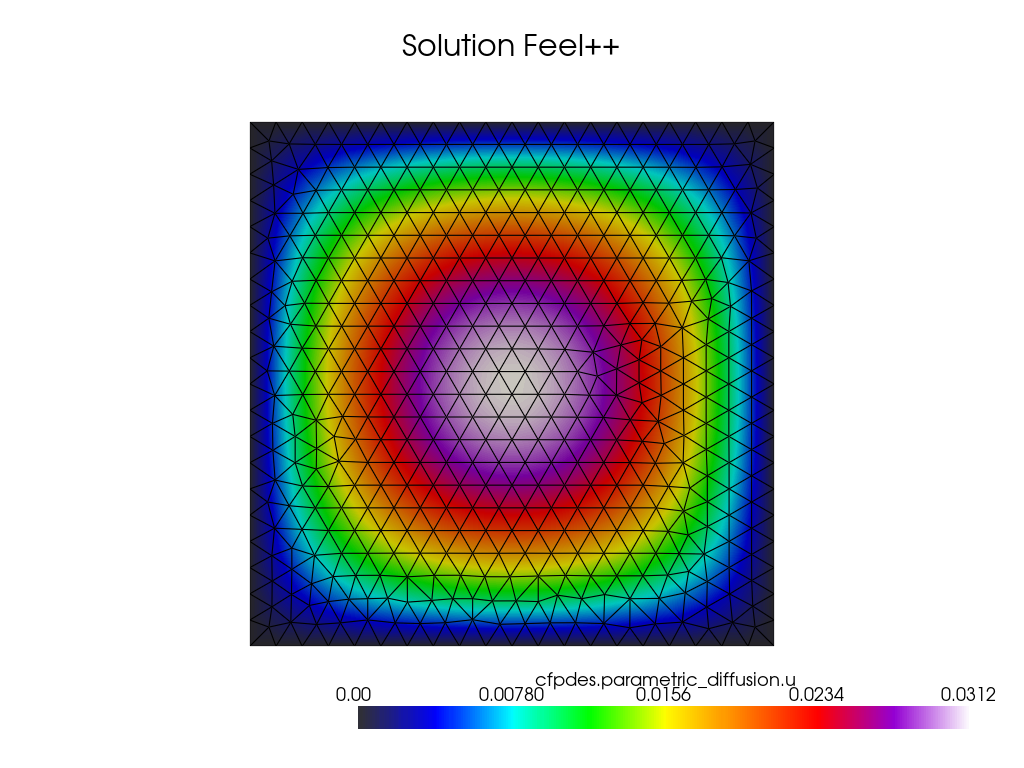

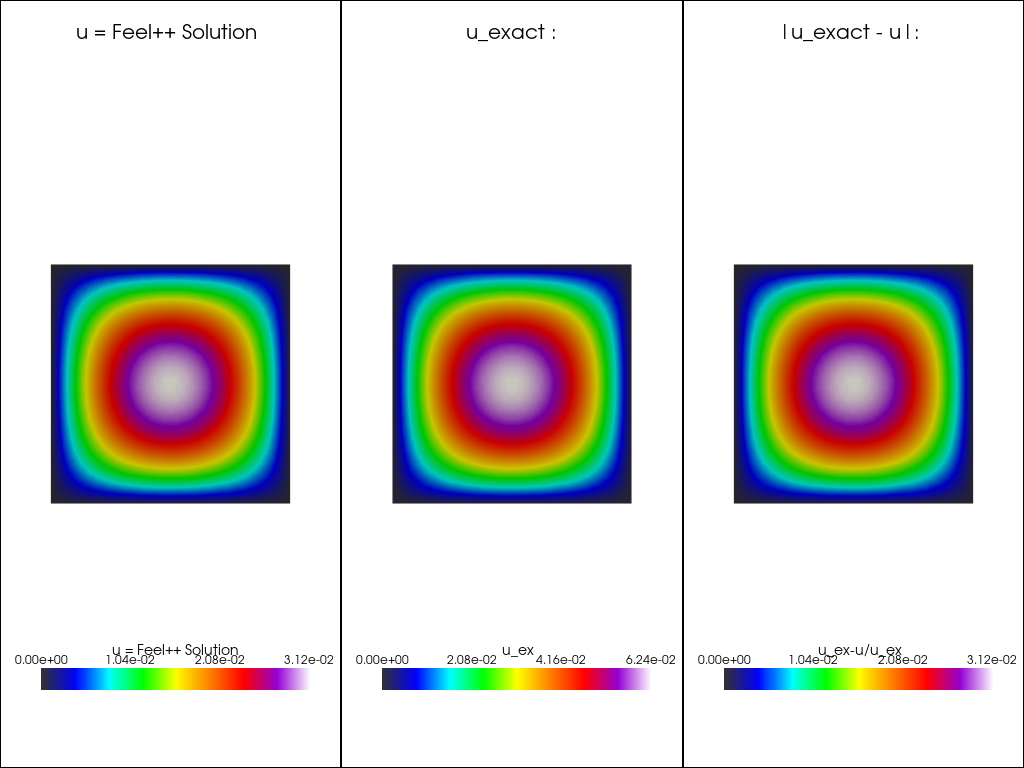

Simulation de diffusion paramétrique terminée pour mu = 2.0
Terminé les simulations de diffusion paramétrique pour toutes les valeurs de mu.


In [2]:
rhs_expr = '2*x*(1 - x) + 2*y*(1 - y)'
# Conditions limites de Dirichlet (nulles pour cette solution exacte)
g_expr = '0'
# Solution exacte
u_exact_expr = 'x*(1 - x)*y*(1 - y)'

# Différentes valeurs de mu à tester
mu_values = [0.1, 0.5, 1.0, 2.0]

for mu in mu_values:
    print(f"Résolution pour mu = {mu}")
    P_diff(h=0.05,
           mu=mu,
           rhs=rhs_expr,
           g=g_expr,
           diff='{{{mu},0,0,{mu}}}', # Coefficient de diffusion dépendant de mu (CORRECTION: trois accolades)
           plot=1,
           u_exact=u_exact_expr)
    print(f"Simulation de diffusion paramétrique terminée pour mu = {mu}")

print("Terminé les simulations de diffusion paramétrique pour toutes les valeurs de mu.")

In [3]:
# Définition de la fonction f et de la solution exacte u (celles que vous utilisez)
u_exact_expr = 'x*(1 - x)*y*(1 - y)'
# Le gradient de u_exact est nécessaire pour l'erreur H1
grad_u_exact_expr = '{(1 - 2*x)*y*(1 - y), x*(1 - x)*(1 - 2*y)}'
rhs_expr = '2*y*(1 - y) * (1 - 2*x) + 2*x*(1 - x) * (1 - 2*y)' # Correction du RHS
mu_value = 1.0  # Valeur de mu pour cet exemple (peut être variée dans la boucle de convergence si nécessaire)

# Initialisation de la classe ParametricDiffusion


# Exécution pour un maillage initial
P_diff(h=0.1, mu=mu_value, rhs=rhs_expr, g='0', diff='{{{mu},0,0,{mu}}}', plot=None, u_exact=u_exact_expr, grad_u_exact=grad_u_exact_expr)

h_values = [0.1, 0.05, 0.025, 0.0125, 0.00625]
measures_list = []

for h in h_values:
    print(f"Running simulation for h = {h}")
    P_diff(h=h, mu=mu_value, rhs=rhs_expr, g='0', diff='{{{mu},0,0,{mu}}}', plot=None,
           u_exact=u_exact_expr, grad_u_exact=grad_u_exact_expr)
    measures_list.append(P_diff.measures)
    print(f"Measures for h = {h}: {P_diff.measures}")

print("All measures:", measures_list)

Solving the parametric diffusion problem for mu = 1.0, h = 0.1...
generate mesh omega-2.geo with h=0.1 and dimension=2
[loadMesh] Loading mesh in format geo+msh: "/workspaces/feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo"
[loadMesh] Use default geo desc: /workspaces/feelpp-scimba/feelppdb/feelpp_cfpde/np_1/omega-2.geo 0.1 
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Toolbox::cfpdes-2d-p1 - Use Case Study                                                                                                                                                                              |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| +-----------------